 # Hadamardova transformacija
 
 Hademardova transformacija (Hadamard transform, Walsh–Hadamard transform) je primer klase koja generalizuje Furijeovu transformaciju.
 Ona izvodi ortogonalnu, simetričnu, involutivnu, linearnu operaciju nad $2^{m}$ realnih (kompleksnih) brojeva.
 
 Hadamardova transformacija se može smatrati izgrađenom od diskretnih Furijeovih transformacija (DFT) veličine 2 i zapravo je ekvivalentna višedimenzionalnom DFT-u veličine 2 × 2 × ⋯ × 2 × 2.
 
 Matrica Hademardove transformacije se dobija rekurentnom relacijom:

$$H_0 = + (1)$$

$$H_m = \frac{1}{\sqrt{2}} \begin{pmatrix}H_{m-1} & H_{m-1}\\
H_{m-1} & -H_{m-1}
\end{pmatrix}$$

Hademardove matrice za m = 1, 2, 3.

$$H_1 = \frac{1}{\sqrt{2}} \begin{pmatrix}1 & 1\\
1 & -1
\end{pmatrix}$$

$$H_2 = \frac{1}{2} \begin{pmatrix}1 & 1 & 1 & 1\\
1 & -1 & 1 & -1\\
1 & 1 & -1 & -1\\
1 & -1 & -1 & 1\\
\end{pmatrix}$$

$$H_3 = \frac{1}{2^{3/2}} \begin{pmatrix}1 & 1 & 1 & 1 & 1 & 1 & 1 & 1\\
1 & -1 & 1 & -1 & 1 & -1 & 1 & -1\\
1 & 1 & -1 & -1 & 1 & 1 & -1 & -1\\
1 & -1 & -1 & 1 & 1 & -1 & -1 & 1\\
1 & 1 & 1 & 1 & -1 & -1 & -1 & -1\\
1 & -1 & 1 & -1 & -1 & 1 & -1 & 1\\
1 & 1 & -1 & -1 & -1 & -1 & 1 & 1\\
1 & -1 & -1 & 1 & -1 & 1 & -1 & 1\\
\end{pmatrix}$$

U klasičnoj primeni, Hadamardova transformacija se može izračunati u $nlogn$ operacija $(n = 2^m)$, koristći algoritam brze Hadamardove transformacije.
U kvantnom domenu, Hadamardova se transformacija može izračunati u $O(1)$ vremenu.

Hadamardova transformacija se takođe koristi u kriptografiji, kao i u procesiranje signala i algoritmima za kompresiju podataka. U  aplikacijama za video kompresije, obično se koristi u obliku sume apsolutno transformiranih razlika. To je takođe presudan deo Groverovog i Šorovog algoritma u kvantnom računanju. Hadamardova se primenjuje i u eksperimentalnim tehnikama poput NMR, masovne spektrometrije i kristalografije.

In [1]:
import numpy as np

In [2]:
def hademard_matrix(m):
    h_0 = 1
    
    h_prev = h_0
    for _ in range(m):
        h_new = np.block([[h_prev, h_prev], [h_prev, -1 * h_prev]])
        h_prev = h_new
        
    return h_new

In [3]:
def hademard_coef(m):
    return 2 ** (-m / 2)

In [4]:
m = 3

In [5]:
matrix = hademard_matrix(m)

In [6]:
matrix

array([[ 1,  1,  1,  1,  1,  1,  1,  1],
       [ 1, -1,  1, -1,  1, -1,  1, -1],
       [ 1,  1, -1, -1,  1,  1, -1, -1],
       [ 1, -1, -1,  1,  1, -1, -1,  1],
       [ 1,  1,  1,  1, -1, -1, -1, -1],
       [ 1, -1,  1, -1, -1,  1, -1,  1],
       [ 1,  1, -1, -1, -1, -1,  1,  1],
       [ 1, -1, -1,  1, -1,  1,  1, -1]])

In [7]:
coef = hademard_coef(m)

In [8]:
coef

0.3535533905932738

Postoji i ugrađena funkcija koja vraća Hadamardovu matricu:

In [9]:
from scipy.linalg import hadamard

In [10]:
hadamard(2, dtype=complex)

array([[ 1.+0.j,  1.+0.j],
       [ 1.+0.j, -1.-0.j]])

In [11]:
hadamard(8)

array([[ 1,  1,  1,  1,  1,  1,  1,  1],
       [ 1, -1,  1, -1,  1, -1,  1, -1],
       [ 1,  1, -1, -1,  1,  1, -1, -1],
       [ 1, -1, -1,  1,  1, -1, -1,  1],
       [ 1,  1,  1,  1, -1, -1, -1, -1],
       [ 1, -1,  1, -1, -1,  1, -1,  1],
       [ 1,  1, -1, -1, -1, -1,  1,  1],
       [ 1, -1, -1,  1, -1,  1,  1, -1]])

Ekvivalentno, Hadamardovu tranformaciju možemo definisati i po koordinatama za $(Hm)_{kn}$:

\begin{aligned}k&=\sum _{i=0}^{m-1}{k_{i}2^{i}}=k_{m-1}2^{m-1}+k_{m-2}2^{m-2}+\dots +k_{1}2+k_{0}\\n&=\sum _{i=0}^{m-1}{n_{i}2^{i}}=n_{m-1}2^{m-1}+n_{m-2}2^{m-2}+\dots +n_{1}2+n_{0}\end{aligned}
gde su $k_j$ i $n_j$ bitovi (0 ili 1) binarnog zapisa brojeva $k$ i $n$.  
Dobijamo:
$$(H_{m})_{k,n}={\frac {1}{2^{m/2}}}(-1)^{\sum _{j}k_{j}n_{j}}$$

Ovo je multidimenzionalna $2\times 2\times \cdots \times 2\times 2$ DFT, normalizovana da bude unitarna.

Na primer, ako je $m \geq 2$, tada je $$(H_{m})_{3,2}\;=\;(-1)^{3\cdot 2}\;=\;(-1)^{(1,1)\cdot (1,0)}\;=\;(-1)^{1+0}\;=\;(-1)^{1}\;=\;-1 $$

In [12]:
def get_element(k, n):
    k_binary = []
    n_binary = []
    
    while (k != 0 or n != 0):
        k_binary = np.append([k % 2], k_binary)
        n_binary = np.append([n % 2], n_binary)
        
        k = k // 2
        n = n // 2
        
    exp = np.dot(k_binary, n_binary)
    
    #exp = bin(k & n).count('1')
    
    return (-1) ** exp

In [13]:
get_element(3, 2)

-1.0

### Preuredjena Hadamardova transformacija - Walshova transformacija

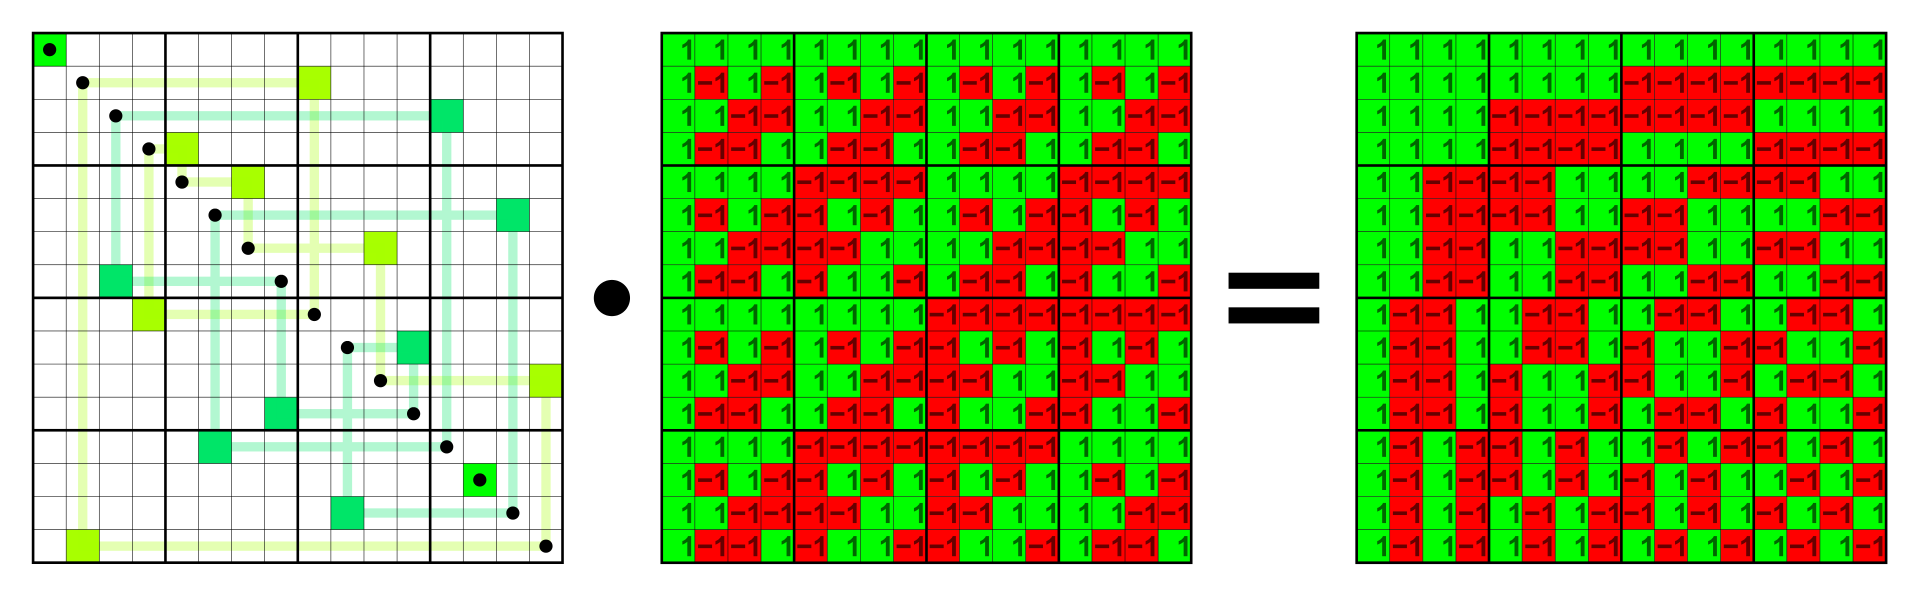

In [14]:
def walsh_order(n):
    m = hademard_matrix(n)
    
    N = m.shape[0]
    array = np.zeros(N)
    
    for i in range(N):
        row = m[i]
        count = 0
        
        for j in range(N - 1):
            if row[j] * row[j + 1] == -1:
                count += 1
        array[i] = count
            
    a = []
    for i in range(N):
        arg_max = np.argmin(array)
        
        a.append(m[arg_max])
        array[arg_max] = N
        
    return np.array(a)

In [15]:
a = walsh_order(8)

In [16]:
a

array([[ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ..., -1, -1, -1],
       [ 1,  1,  1, ...,  1,  1,  1],
       ...,
       [ 1, -1,  1, ..., -1,  1, -1],
       [ 1, -1,  1, ...,  1, -1,  1],
       [ 1, -1,  1, ..., -1,  1, -1]])

Redovi Hadamardove matrice su Walsh-ove funkcije.

U matematici, preciznije u harmonijskoj analizi, Walsh-ove funkcije formiraju kompletan ortogonalan skup funkcija
koje se mogu koristiti za predstavljanje bilo koje diskretne funckije - nalik trigonometrijskim funkcijama koje
se mogu koristiti za reprezentaciju bilo koje neprekidne funkcije u Furijeov red.
Walsh-ovo funkcije su konstantne funkcije i uzimaju vrednost $-1$ i $1$.

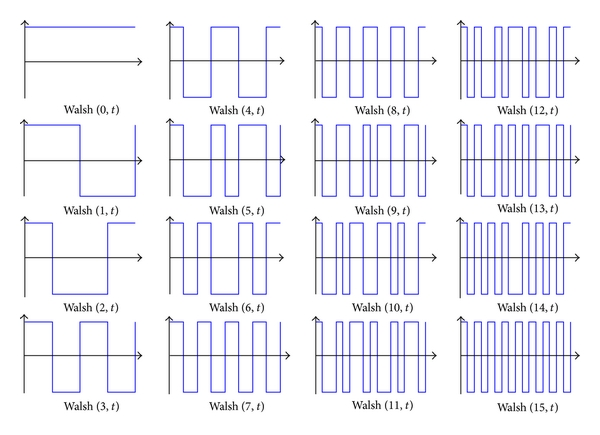

https://www.mathworks.com/help/signal/ug/discrete-walsh-hadamard-transform.html

https://www.mathworks.com/help/signal/ug/walshhadamard-transform.html

https://github.com/dingluo/fwht/blob/master/FWHT.py

https://quantatrisk.com/2015/04/07/walsh-hadamard-transform-python-tests-for-randomness-of-financial-return-series/

https://pythonmana.com/2022/03/202203310912564161.html